In [1]:
import numpy as np
from astroquery.mast import Catalogs
from astroquery.mast import Tesscut
from astroquery.mast import Observations
from astropy.wcs import WCS
from astropy.io import fits
import matplotlib.pyplot as plt
%matplotlib inline

In [42]:
#Insert TIC ID and BJD
tic_id = '167602025'
bjd = 2458344.875
sector = '1'
tbjd = bjd - 2457000.00


def dload_url (tic_id, sector): #Dowloads URL through query for general 2-minute cadence data given TIC ID and Sector
    
    obsTable = Observations.query_criteria(
        obs_collection = "HLSP", project = "TESS",
        dataproduct_type = ["timeseries"],
        target_name = tic_id,
        sequence_number=sector)
    products = Observations.get_product_list(obsTable)
    manifest = Observations.download_products(products, extension = "fits")
    return manifest

def gen_url(tic_id, sector, cadence, version): #Generates URL for TASOC data given TIC ID, Sector, Cadence, and Version
    tic_id_1 = tic_id.zfill(16)
    tic_id_2 = tic_id.zfill(11)
    if (cadence == '1800'):
        sub_dir = "ffi"
    else: 
        sub_dir = "tpf"
    cadence = cadence.zfill(4)
    
    url = "http://archive.stsci.edu/hlsps/tasoc/s000" + str(sector) + "/" + sub_dir + "/" \
            + tic_id_1[0:4] + "/" + tic_id_1[4:8] + "/" + tic_id_1[8:12] + "/" + tic_id_1[12:16] + "/"\
            + "hlsp_tasoc_tess_" + sub_dir + "_tic" + tic_id_2 + "-s0" + str(sector) + "-c" + cadence + "_tess_"\
            + version + "_lc.fits"
    return url

In [43]:
#manifest = dload_url(tic_id, sector)
#fits_lc = manifest[0][0]

fits_lc = gen_url(tic_id, sector, '1800', 'v04')
fits.info(fits_lc)
fits.getdata(fits_lc, ext=1)

Filename: /Users/jshabazz/.astropy/cache/download/py3/03871c8cd9c9783c577a89266dc542a9
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      47   ()      
  1  LIGHTCURVE    1 BinTableHDU     88   1282R x 14C   [D, E, J, D, D, D, D, D, J, J, D, D, D, D]   
  2  SUMIMAGE      1 ImageHDU        87   (15, 15)   float64   
  3  APERTURE      1 ImageHDU        87   (15, 15)   int32   


FITS_rec([(1325.3230338 , -0.00048347, 4697, 7389.45507812, 3.08390427, 3580.83129883, nan, nan, 0, 0, 1918.82937024, 1015.97109509, -0.00100657,  0.00832977),
          (1325.34386684, -0.00048376, 4698, 7435.19482422, 3.0972991 , 3644.76660156, nan, nan, 0, 0, 1918.82849472, 1015.9721866 , -0.00042567,  0.00569806),
          (1325.36469988, -0.00048404, 4699, 7449.02148438, 3.11425972, 3773.42285156, nan, nan, 0, 0, 1918.82843226, 1015.97360334,  0.01251346,  0.03818714),
          ...,
          (1353.11440126, -0.00077155, 6031, 7404.23535156, 3.12165093, 3884.9675293 , nan, nan, 0, 0, 1918.82350355, 1015.86566076,  0.00188886, -0.00423462),
          (1353.13523433, -0.00077181, 6032, 7404.45214844, 3.12171984, 3882.97412109, nan, nan, 0, 0, 1918.82158741, 1015.86649768,  0.07861906,  0.0854366 ),
          (1353.15606739, -0.00077207, 6033, 7402.39648438, 3.1212306 , 3882.66625977, nan, nan, 0, 0, 1918.82399112, 1015.86537101,  0.00327592,  0.08037379)],
         dtype=(numpy.re

In [44]:
#Stores HDU data into variables for plotting
with fits.open(fits_lc, mode="readonly") as hdulist:
    tess_bjds = hdulist[1].data['TIME']
    #sap_fluxes = hdulist[1].data['SAP_FLUX']
    pdcsap_fluxes = hdulist[1].data['FLUX_RAW']

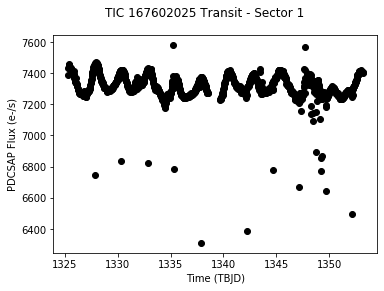

In [45]:
#PLOT LIGHT CURVE
#t0 = tbjd #transit time

fig, ax = plt.subplots()

ax.plot(tess_bjds, pdcsap_fluxes, 'ko')

#ax.set_xlim(1365, 1370)


#ax.axvline(x=t0, color = 'red')

fig.suptitle("TIC " + str(tic_id) + " Transit - Sector " + str(sector))
ax.set_ylabel("PDCSAP Flux (e-/s)")
ax.set_xlabel("Time (TBJD)")

plt.subplots_adjust(left=0.15)
plt.show()